<font size='5'>Abs(log_return) auto-correlation decay </font>

This notebook is an experiment in finding auto-correlation over an intraday time horizon with minutely OHLC data. The absolute values of log returns show that auto-correlation decays after a certain number of time steps. The auto-correlation at the minute level survives even after applying diff() to the data, making it stationary. 

The ACF function is defined as follows, 

$$ \huge \operatorname{ACF}(\tau) = \frac{\sum_{t=1}^{n-\tau} (x_t - \bar{x})(x_{t+\tau} - \bar{x})}{\sum_{t=1}^n (x_t - \bar{x})^2} $$

In [32]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import statsmodels.api as sm

Get the data. 

In [33]:
ohlc = pd.read_csv('./data/TLT_sample.csv')
closes = np.log(ohlc['marketClose']).diff()

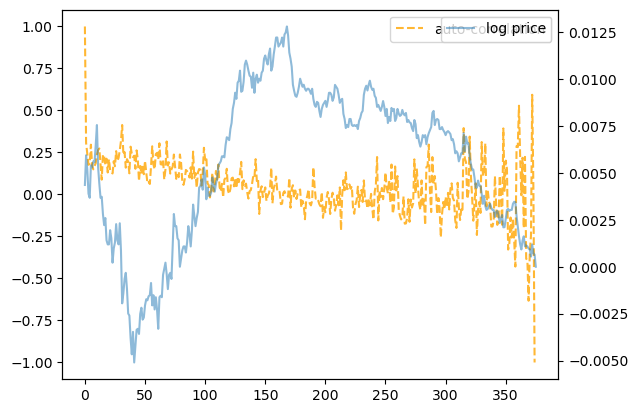

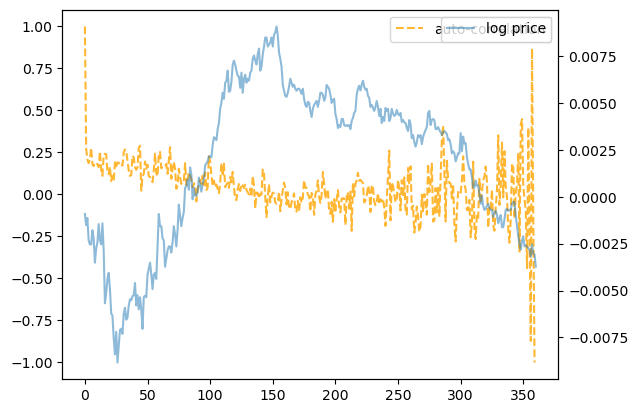

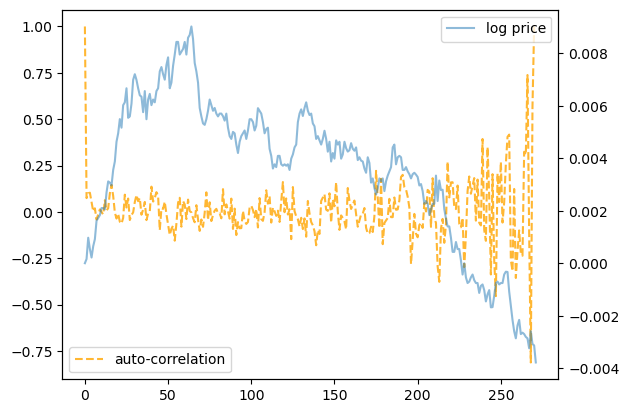

In [34]:

decay_func = lambda S, _range: [S.apply(abs).autocorr(lag=N) for N in _range]

def get_decay(df):
    
    # Check if the dataframe is empty
    if df.empty or len(df) <= 1: 
        return

    # Find the largest value in the data
    max_value = df.idxmax()

    # Split the data into two sets: one before and one after the largest value
    df_before = df[:max_value-1]
    df_after = df[max_value:]

    if len(df_after) > 1 and len(df_before) > 1:
        
        # Show Decay
        fig, ax = plt.subplots()
        ax2 = ax.twinx()
        sns.lineplot(data=decay_func(df_after, range(0, len(df_after))), label='auto-correlation', ax=ax, color='orange', alpha=0.8, linestyle='--')
        sns.lineplot(data=df_after.cumsum().values, label='log price', ax=ax2, alpha=0.5)
        plt.legend()
        plt.show()

        # Recursion to analyze each split after the largest move 
        get_decay(df_after)

# Call Function
get_decay(closes)